Problem Definition

This is a Brazilian ecommerce public dataset of orders made at Olist Store available at Kaggle. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.


**Database diagram :** 
![UML_chart](visualisation/HRhd2Y0.png)

In [111]:
# Library import
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [112]:
# PEP8 Checker

#%load_ext pycodestyle_magic
#%pycodestyle_on

In [113]:
# Calculated the missing rate of a column
def filling_factor(df):
    missing_df = df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df['filling_factor'] = \
        (df.shape[0] - missing_df['missing_count']) / df.shape[0] * 100
    missing_df = \
        missing_df.sort_values('filling_factor').reset_index(drop=True)
    return missing_df

# Data cleaning

I will first clean datasets link to order. The objective is to build a dataset with all interested informations on orders, with each line representing one order.

## Order datasets

In [114]:
# Orders datasets loading
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')

In [115]:
# Creation of a dict with all datasets
datasets = {'orders':orders,
            'orders_items':order_items,
            'orders_payements':order_payments,
            'orders_reviews':order_reviews}

In [116]:
# Visualisation of the orders dataset
for name, dict_ in datasets.items():
    print(name)
    display(dict_.sample(10))
    print(dict_.shape)
    print('-'*50, '\n')

orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
43048,7fecdb45a98a2b1b32535d5e97788cdd,18b9dfb260a90787742abd090d0d0f30,delivered,2018-06-28 17:01:00,2018-06-28 17:15:12,2018-07-02 14:27:00,2018-07-04 18:38:36,2018-07-20 00:00:00
60530,b5f211fa89c1521c13362d1adb004aed,d962bd2ab8e3cbb417a6d31fcfe313a9,delivered,2018-01-03 17:12:03,2018-01-03 17:26:36,2018-01-09 00:18:57,2018-01-23 16:23:40,2018-02-06 00:00:00
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
83640,dd25c0d770dfe6c63eeb2949b311267d,ba42ca46af3bb6e79e02b0f3d6db6ca5,delivered,2018-05-07 16:19:44,2018-05-07 17:56:22,2018-05-08 15:22:00,2018-05-09 19:25:38,2018-05-18 00:00:00
81647,e2c37260c7a927c7d9808341dbe2924c,6b4f91a9fab27a20ddb02901e2e92ffb,delivered,2017-11-06 15:23:07,2017-11-06 23:31:59,2017-11-08 16:42:15,2017-11-16 17:52:10,2017-11-30 00:00:00
93052,f4e86d12ddc6d795b86817623a9de164,9fdde8e80344faf4867a80ce47f44863,delivered,2018-01-17 09:40:18,2018-01-17 09:51:24,2018-01-17 18:05:34,2018-02-22 19:45:20,2018-02-14 00:00:00
81297,5510c1adb5cc6262d2fd7ce904b6e8f4,cc8f275edbf7e0d420a100dd30ecbf68,delivered,2018-05-20 18:20:00,2018-05-20 18:35:19,2018-05-21 13:38:00,2018-06-15 15:37:33,2018-06-07 00:00:00
11532,7d8251f4917688913c97d1505d6f336d,885116304d63452ff9973b3f372f6018,delivered,2018-04-18 14:52:38,2018-04-18 15:11:13,2018-04-20 02:46:36,2018-04-30 21:46:40,2018-05-09 00:00:00
18436,db938741a6e086fc10ca5c84d032fef3,52cba52537119edf3f855dab63b3e7bc,delivered,2018-04-25 14:16:47,2018-04-26 14:11:53,2018-04-27 16:14:00,2018-05-10 21:21:06,2018-05-23 00:00:00
74385,7f01243bfbb619e73796571192245fce,bf2f941a497aa93ace6c2dc0b55984a7,delivered,2018-08-23 14:14:37,2018-08-23 14:25:56,2018-08-23 14:10:00,2018-08-24 15:58:33,2018-09-04 00:00:00


(99441, 8)
-------------------------------------------------- 

orders_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
84368,bfb1a4b760e9c724cd7e14be83b61b54,3,703d742887bb9267f89b675608ba7aa0,640e21a7d01df7614a3b4923e990d40c,2018-05-24 21:54:11,56.1,22.65
18001,293ec51a1a182acaee7fab9845e8cfc4,1,ca2a703b0fde4c81cf556baea471e978,aafe36600ce604f205b86b5084d3d767,2017-07-13 18:25:19,59.9,13.57
21245,30a04f020785d7dbc002c7b48d1ecb79,1,dab9c91ff81f632aff81bb4cb671cd18,bacb1f0ed56ad24198f5810d2b3fe9a5,2017-07-24 04:43:10,204.9,43.84
29192,4269e9f98b1e74f0732bc93de6aaca6f,1,c86f95986c7050bf988aed62520093e7,b1fecf4da1fa2689bccffa0121953643,2017-01-27 10:21:21,310.9,20.31
37394,54dfaf9697f69a07a441fc17ab325f5c,1,ef23a80c3e7f9c63e9956f6f54b1cf15,1d29dfba02015238dfbe2449a5eaa361,2018-05-14 13:31:20,52.9,18.25
104341,ed0b1b983f9bd6988b9865f7e774b885,1,51f876eb62be778c757503cf7f8a3b74,f84a00e60c73a49e7e851c9bdca3a5bb,2018-01-26 13:55:01,9.8,7.94
36103,51dbf092f04368fda17fb25eb2d75eca,1,04939dcb29e2a26106610d8e1ef03b98,44073f8b7e41514de3b7815dd0237f4f,2018-02-15 14:29:04,128.3,23.22
18618,2ac8de6b0905ecba2257dd9c59282d0a,1,0776155007ad20447a0b0f91d4aad644,e9779976487b77c6d4ac45f75ec7afe9,2017-05-11 13:30:20,17.0,14.52
34845,4ee4b8462b9a39ac1fa86e28bcc22ad3,1,13050bbc5cf6938a3760e43f1a845fcd,4b0fdb526525f9890eb145bf1534640e,2018-08-16 11:45:16,56.9,14.71
25745,3a80aeee2f23cb1e2052c30a451779ee,1,83834e0b46caaf58fbceba67c0ecb843,0ea22c1cfbdc755f86b9b54b39c16043,2017-05-08 13:10:43,29.9,14.52


(112650, 7)
-------------------------------------------------- 

orders_payements


,order_id,payment_sequential,payment_type,payment_installments,payment_value
20031,fe1c1fccd493681d4ab9f8f2a70faac1,1,boleto,1,133.50
62902,aee682982e18eb4714ce9f97b15af5e2,1,boleto,1,128.04
93128,d9b0d609decccee6466fb61adbc03f3d,1,credit_card,1,36.09
20517,0fc95c806aba2b8aef43db06838ec606,1,credit_card,10,2187.42
89257,0516c22655fe1e1f0b3390f4ee3fc5f6,1,voucher,1,31.92
25720,e71f305bd634aa47b14ee018ec8f6f38,1,debit_card,1,85.15
103577,a38f658be81cb0101121c8a7fdc5efae,1,credit_card,2,94.40
17173,20ef96a94887a09470ce16449d10b185,1,credit_card,1,28.00
50426,d3704905336bdc5710b2bc0b55d9aad1,1,credit_card,10,167.63
19380,90707a3b41e1c6cde0740f9754490e92,1,credit_card,3,61.14


(103886, 5)
-------------------------------------------------- 

orders_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
51244,708afe421586a1818e30c55a17ea2acf,4aed2e7583609a6a24a9fb2c7b6403f2,4,NaN,NaN,2018-01-19 00:00:00,2018-01-21 00:38:07
2893,537f04cd5da884171ccab2680eb6c960,cb33ba59f7f3b3d1f5caf3e8176551ea,5,NaN,bom,2017-09-05 00:00:00,2017-09-06 14:43:22
73267,5113be60439e821d32701b0a44b997d7,a0c743456ff5737ebbcdaa56c9b2869b,5,NaN,NaN,2017-11-24 00:00:00,2017-11-27 01:36:03
18841,12cff24ef2b4f1916bbf63c2b0e5cd34,693c482b69198a2297a3b61befcd3890,5,NaN,"Otimo produto. Porem recebi na cor rosa, no an...",2018-04-11 00:00:00,2018-04-13 21:21:03
79655,3f01296d02cc38c5e1c700eb160e2228,2a0facc85fc2b839b8c194436787402b,1,Gostaria de trocar.,Eu escolhi o conjunto safari dourado e veio br...,2018-05-24 00:00:00,2018-05-24 15:12:26
94584,25d9e5b24f6695a93e62b0dfc9fce8ac,3cb62f32aa39070417cd9515cee4bae7,4,NaN,NaN,2018-01-24 00:00:00,2018-01-24 07:54:48
1406,0af4c5ef621d4e41a7ac52441d7b5d7f,2f921a8c1d6f7937df5c7fb0468f6f07,5,NaN,NaN,2018-02-09 00:00:00,2018-02-16 13:26:45
82470,6c5fa5032b02334731c89071e1b2763f,4c05a3711a90dee7f6336af0f3385142,5,NaN,OTIMO PRODUTO,2017-05-27 00:00:00,2017-05-29 13:17:16
24402,7c93f9e8b0b1e3a76a083381fd0d6cb5,1222dd8e203987d55f99c5552d41746e,5,NaN,NaN,2017-10-04 00:00:00,2017-10-07 00:06:07
29497,fd56363899e56a7404b1830d68cdaa43,dc34d61bf65f9f7362aafd4fdc35d21a,5,NaN,NaN,2018-03-03 00:00:00,2018-03-03 09:31:23


(99224, 7)
-------------------------------------------------- 



In [117]:
# Exploration of missing values
for name, dict_ in datasets.items():
    print(name)
    display(filling_factor(dict_))
    print('-'*50, '\n')

orders


,column_name,missing_count,filling_factor
0,order_delivered_customer_date,2965,97.018332
1,order_delivered_carrier_date,1783,98.206977
2,order_approved_at,160,99.839101
3,order_id,0,100.000000
4,customer_id,0,100.000000
5,order_status,0,100.000000
6,order_purchase_timestamp,0,100.000000
7,order_estimated_delivery_date,0,100.000000


-------------------------------------------------- 

orders_items


,column_name,missing_count,filling_factor
0,order_id,0,100.0
1,order_item_id,0,100.0
2,product_id,0,100.0
3,seller_id,0,100.0
4,shipping_limit_date,0,100.0
5,price,0,100.0
6,freight_value,0,100.0


-------------------------------------------------- 

orders_payements


,column_name,missing_count,filling_factor
0,order_id,0,100.0
1,payment_sequential,0,100.0
2,payment_type,0,100.0
3,payment_installments,0,100.0
4,payment_value,0,100.0


-------------------------------------------------- 

orders_reviews


,column_name,missing_count,filling_factor
0,review_comment_title,87656,11.658470
1,review_comment_message,58247,41.297468
2,review_id,0,100.000000
3,order_id,0,100.000000
4,review_score,0,100.000000
5,review_creation_date,0,100.000000
6,review_answer_timestamp,0,100.000000


-------------------------------------------------- 



In [118]:
# Column by column analysis
for name, dict_ in datasets.items():
    print(name, '-'*20)
    for col in dict_.columns:
        if dict_[col].nunique() < 30:
            print('Column {}, unique value :\n{}\n'.format(col,
                                                           dict_[col].unique()))
        else:
            print('Column {}, {} unique value'.format(col,
                                                      dict_[col].nunique()))
    print('-'*50, '\n')

orders --------------------
Column order_id, 99441 unique value
Column customer_id, 99441 unique value
Column order_status, unique value :
['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']

Column order_purchase_timestamp, 98875 unique value
Column order_approved_at, 90733 unique value
Column order_delivered_carrier_date, 81018 unique value
Column order_delivered_customer_date, 95664 unique value
Column order_estimated_delivery_date, 459 unique value
-------------------------------------------------- 

orders_items --------------------
Column order_id, 98666 unique value
Column order_item_id, unique value :
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]

Column product_id, 32951 unique value
Column seller_id, 3095 unique value
Column shipping_limit_date, 93318 unique value
Column price, 5968 unique value
Column freight_value, 6999 unique value
-------------------------------------------------- 

orders_payements -----------

### Orders

Orders dataset is orders informations at the order scale meaning that each line represent one order with order_id being the primary key of the datasets.
There is no missing values for importante variable namely order_id, customer_id, order_status and order_purchase_timestamp

Orders have 99441 lines and 8 columns

- customer_id is the foreign key to connect to the customers dataset
- order_id is the foreign key to connect with every other order based dataset


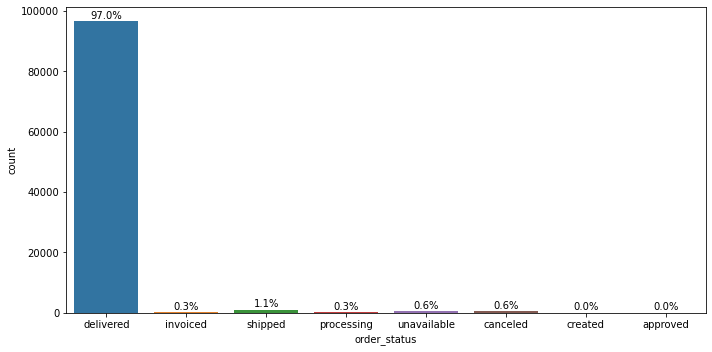

In [119]:
# Barchart visualisation of orders order_status
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='order_status',
                   data=orders)
total = len(orders)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

In [120]:
# Keep only delivered order
drop_index = orders[orders['order_status'] != 'delivered'].index
orders.drop(drop_index, axis=0, inplace=True)

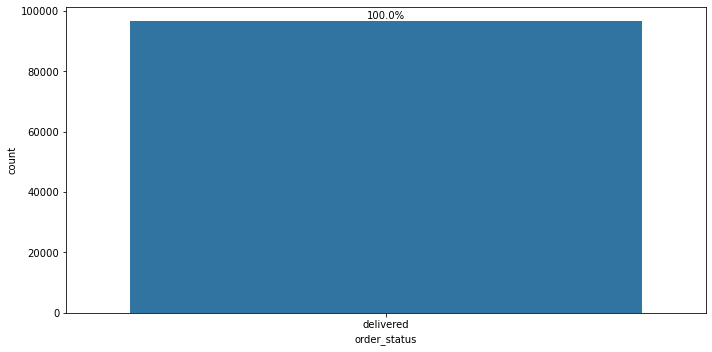

In [121]:
# Barchart visualisation of orders order_status ofter drop
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='order_status',
                   data=orders)
total = len(orders)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

I will drop NaN as it represent a very small amount of information.

In [122]:
# Drop all NaN
orders.dropna(axis=0, inplace=True)

In [123]:
filling_factor(orders)

,column_name,missing_count,filling_factor
0,order_id,0,100.0
1,customer_id,0,100.0
2,order_status,0,100.0
3,order_purchase_timestamp,0,100.0
4,order_approved_at,0,100.0
5,order_delivered_carrier_date,0,100.0
6,order_delivered_customer_date,0,100.0
7,order_estimated_delivery_date,0,100.0


In [124]:
# Keep importante variables
orders = orders.loc[:, ['order_id',
                        'customer_id',
                        'order_purchase_timestamp',
                        'order_delivered_customer_date']]
orders.sample(10)

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date
42600,1ac1cd9823b09ef5a14a07fdac1aee94,5906102635e5715ee056520207b101a0,2017-10-04 10:43:19,2017-10-13 17:14:18
40636,87979d4911d8ddfec45cd5ebccfb535b,8108be015f1623687cb6582904cf4fb7,2018-01-01 20:33:42,2018-01-19 20:26:26
33742,769edf3b3fbf7e26277b5188c2b76ba3,8e6103f34c89287ebcbb05d852e8a31c,2018-03-11 12:47:23,2018-03-19 19:58:43
67592,9823470255ccbe326173868208d9c4df,e0ae8a3a141d851bc25a2034dd966792,2018-06-23 22:14:42,2018-06-28 19:21:23
64328,75ac904a1ba87fab8d6d93751d68ddb1,9c033575d6b8818ce82640aa5674494c,2017-10-20 22:02:06,2017-10-31 23:24:34
32493,816a46a1473af18688a832b10acf062b,bfd67443b57d0bf7c809e99ce4ebf132,2017-12-10 13:30:00,2017-12-13 15:09:00
28530,73458aad836a51a5e37323b7cefc54fc,85645f6b4277fbac7ae2cb3f0bffcc80,2018-03-14 22:16:46,2018-04-10 16:12:36
33951,13560ce213996d123d92f607e1ed93c7,4b25a602db6555d3fb9b68fa850aa954,2018-05-02 20:22:11,2018-05-18 18:19:41
11736,c3c21324197aea2e6d019d16a7cab5ef,b01464130e1c9d4bc0d5d018ccf34b0a,2017-10-24 18:43:25,2017-11-03 21:41:31
13945,116f5088fd9393bef556fc932533e3dc,ea5cb9da00ef93de9dc60b6b4286589e,2018-08-07 23:02:24,2018-08-16 23:41:10


### Order items

Order_items has no missing values. 
In this dataset we have the details of each order. We are going to modify it to have a dataset containing for one line one order. 
For this we will sum freight_value and price value of each order_id and take the maximum date for shipping limit date. 

Order_items have 112650 lines and 7 columns

- product_id is the foreign key to connnect to product based dataset 
- seller_id is the foreign key to connect to the seller based dataset


In [125]:
# Creation of an order based dataset
order_infos = order_items.groupby('order_id')\
    .agg(tot_price=('price', 'sum'),
         tot_freight_value=('freight_value', 'sum'),
         shipping_limit_date=('shipping_limit_date', 'max'),
         nbr_items=('order_item_id', 'max')).reset_index()

In [126]:
order_infos.sample(10)

,order_id,tot_price,tot_freight_value,shipping_limit_date,nbr_items
19706,335cf1cb074c8dfcdf59bc86f8255409,49.80,19.04,2018-05-22 09:30:58,1
36328,5e9539c329818fcbcf5579c92a58501d,50.00,17.44,2018-01-08 19:09:07,2
69660,b51e7cbbbfa8be3170cd749bf5c8d2ba,634.40,46.72,2018-07-26 05:05:14,1
66385,acd8818cd21fdfa62f891ceb60326435,369.90,23.24,2017-12-15 12:30:26,1
72656,bca16cf360ca8795f24ca0beaf2658be,265.52,137.04,2017-12-20 02:12:33,4
4119,0a92bad75c24fdf33ed2a18801262e89,42.90,13.64,2018-08-17 20:25:16,1
37533,61adad1a4c7270ba128c1b42a00dc513,85.90,14.33,2018-02-22 12:30:25,1
22706,3af2a81272fcd0c650bd44f53f7e61ef,49.99,15.10,2017-12-06 15:53:19,1
54299,8d99d2f6f573a9d674fd19d2c0f9a70c,80.00,14.14,2018-07-18 12:31:01,1
56558,93a26c907f3cb027c20d10eb353ba175,49.90,14.10,2017-06-08 11:05:24,1


In [127]:
# Column by column analysis
for col in order_infos.columns:
    if order_infos[col].nunique() < 20:
        print('Column {}, unique value :\n{}\n'.format(col,
                                                       order_infos[col].unique()))
    else:
        print('Column {}, {} unique value'.format(col,
                                                  order_infos[col].nunique()))

Column order_id, 98666 unique value
Column tot_price, 7761 unique value
Column tot_freight_value, 7970 unique value
Column shipping_limit_date, 93018 unique value
Column nbr_items, unique value :
[ 1  2  3  4  5  6  8  7 20 12 10 13 15 11 14 21  9]



We check if their is any outliers for price and freight value

In [128]:
import scipy.stats as stats

In [129]:
# Calculation of the Z score for each values
df_zscore = order_infos.loc[:, ["tot_price", "tot_freight_value"]]\
    .apply(stats.zscore)

In [130]:
# Define as outliers every value with a Z score >= 3
df_zscore['outliers'] = (abs(df_zscore["tot_price"]) >= 30) \
    | (abs(df_zscore["tot_freight_value"]) >= 30)

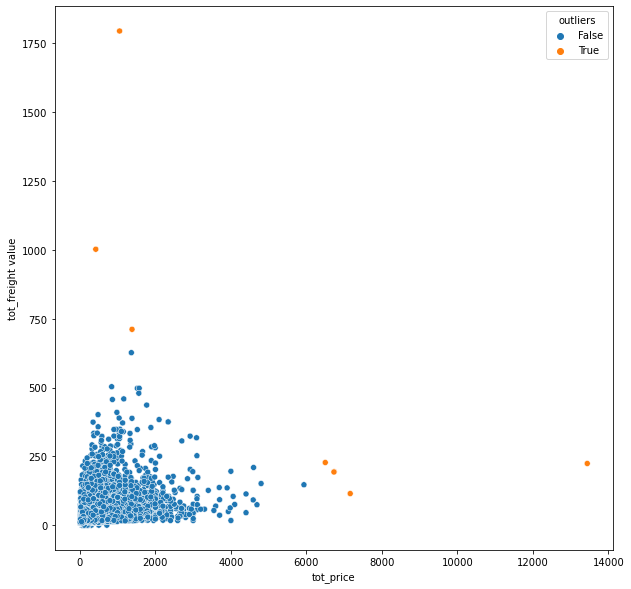

In [131]:
# Visualisation of price and freight value to detect outliers
plt.figure(figsize=(10, 10))
sns.scatterplot(x='tot_price',
                y='tot_freight_value',
                data=order_infos,
                hue=df_zscore['outliers'])
plt.xlabel("tot_price")
plt.ylabel('tot_freight value')
plt.show()

Z-score is too strict to detect outliers. However 2 values seems to be outliers, we are going to drop them.

In [132]:
# Drop outliers
drop_index = order_infos[(order_infos["tot_price"] >= 12000) |
                         (order_infos["tot_freight_value"] >= 1250)].index
order_infos.drop(drop_index, axis=0, inplace=True)

In [133]:
order_infos.sample(10)

,order_id,tot_price,tot_freight_value,shipping_limit_date,nbr_items
49751,8154be10166afed299f6534ee62fc010,60.50,23.00,2018-05-07 05:30:45,1
49344,8046235d64b3479dfce835281a85c0d6,36.00,15.10,2018-03-07 21:35:29,1
7254,12bde787c7633ad4340885ee9f97e373,238.90,21.64,2017-06-22 23:30:13,1
95551,f7fdd9291fb00404aa63adabadc61ec7,99.90,0.00,2018-05-07 02:15:41,1
28157,49000628096970f7939dc39c2f310121,119.90,13.86,2017-05-18 17:45:12,1
21441,37d2697fe30cc343532f58cde9161454,49.99,18.45,2018-07-30 04:10:19,1
70060,b62403f840bd7a9bddb5b25d19c227a6,56.99,8.72,2017-11-28 10:30:26,1
38199,63411626466603435cf74a3d51f8fc8a,1099.00,97.78,2017-09-25 14:35:20,1
47041,7a36ddcacbdd80a7dd8771aa4c6e465e,25.32,18.28,2018-08-09 06:50:13,1
11887,1edc1b84ccb3322ee9f3c206a12c17ce,46.89,7.91,2018-07-24 06:35:11,1


In [134]:
# Keep impotante variables
order_infos = order_infos.loc[:, ['order_id',
                                  'tot_price',
                                  'tot_freight_value',
                                  'nbr_items']]
order_infos.sample(10)

,order_id,tot_price,tot_freight_value,nbr_items
27219,469d6a541e0585ab746ca1d786223ac9,74.90,16.28,1
63494,a584b2acfafd53fc605e76baa4a5cfaf,119.90,14.59,1
9972,19e50267c874c90f2a5a2bc9c2719e2b,59.90,20.84,1
66273,ac8c9e8feb6a2a05ba155bc1e346843b,599.00,32.59,1
65208,a9cd27fff067ca1c5289e063ba082022,50.40,8.51,1
2974,07a75ef36022ad882d61416543b23c54,130.00,10.58,1
32861,55531bd6b11adf2791aeca35f0305e65,24.99,18.28,1
35234,5baf114f7f5f649d16ec1bf3cf78279b,38.99,19.32,1
97138,fc0b3be9d66d6db8d306c15407ece0d7,1299.65,59.82,1
63408,a54f35a6dfb350a13c6410aa276e52d8,133.00,16.56,1


In [135]:
order_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


### Order payment 

Order_payments has no missing values. 
In this dataset we have the details of each order mean of payment.

Order_items have 103886 lines and 5 columns

- order_id the foreign key to connnect to other order based datasets


In [136]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


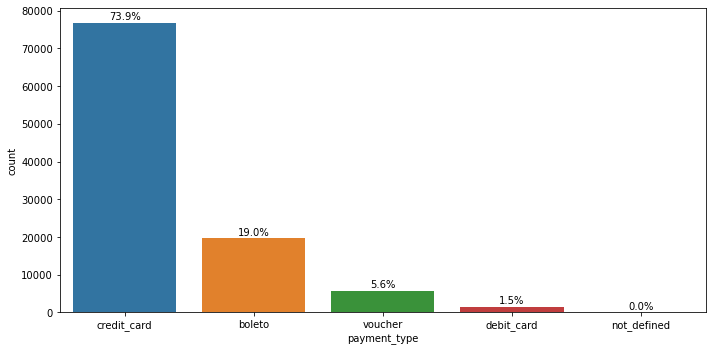

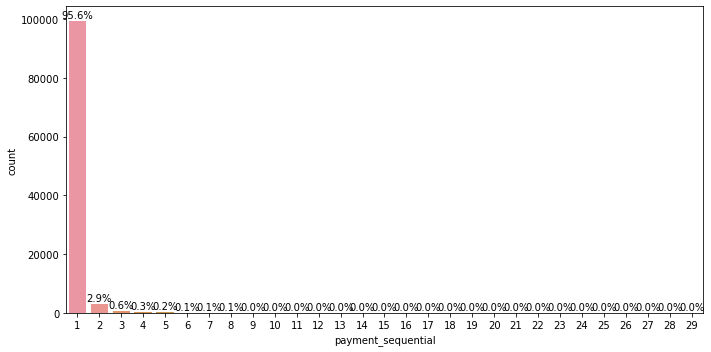

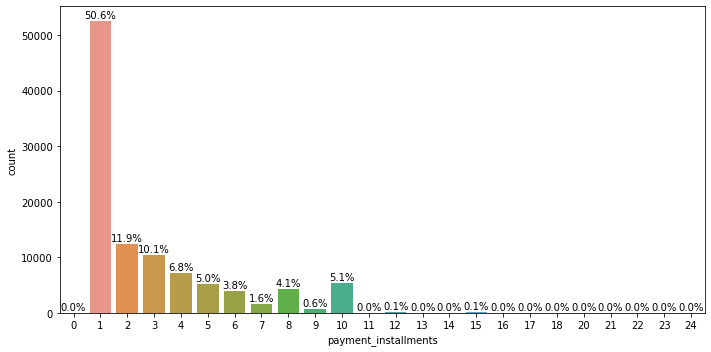

In [137]:
# Barchart visualisation of orders payment type
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='payment_type',
                   data=order_payments)
total = len(order_payments)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

# Barchart visualisation of orders payment sequential
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='payment_sequential',
                   data=order_payments)
total = len(order_payments)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

# Barchart visualisation of orders payment installments
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='payment_installments',
                   data=order_payments)
total = len(order_payments)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

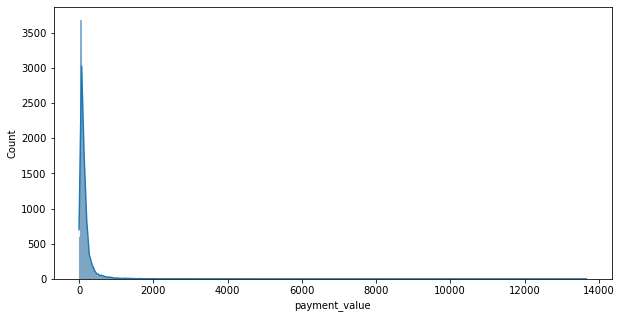

In [138]:
# Distribution of orders value
plt.figure(figsize=(10, 5))
ax = sns.histplot(x=order_payments['payment_value'],
                  kde=True)
plt.show()

In [139]:
order_payments.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
14104,c60c3441e0f514547c9408b300e74ef3,1,credit_card,1,41.23
103114,0c1426109d8295a688ee4182016bba59,1,credit_card,5,61.11
102718,db658dd622104d1e0dc6d4728bb3e267,1,boleto,1,55.10
15065,8e9358bf838db65d965ffe0913252ac8,1,credit_card,8,218.96
71330,712cb14ddeca38aaeb49dea61f811018,1,credit_card,3,63.80
100251,c9890157779e80957a453686f65ed097,1,boleto,1,27.75
93991,dcd32eca6ea6334727d9f7b7ffe58a65,1,boleto,1,72.26
87458,9e610f1799387c81ebe3841937df9098,1,credit_card,3,77.79
49405,a17a8c999619b6b4a7aec9d534cd56f2,1,credit_card,1,55.13
39522,cd1a20782013109d1ec8320dff14d666,1,boleto,1,163.79


There is no missing value or any obvious outliers. So no modification is needed here.

### Order_reviews

Order_reviews has a few missing values but no missing values on interested variables. review_id is the primary key of the dataset
In this dataset we have the details of each order reviews.

Order_items have 99224 lines and 7 columns

- order_id the foreign key to connnect to other order based datasets


In [140]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


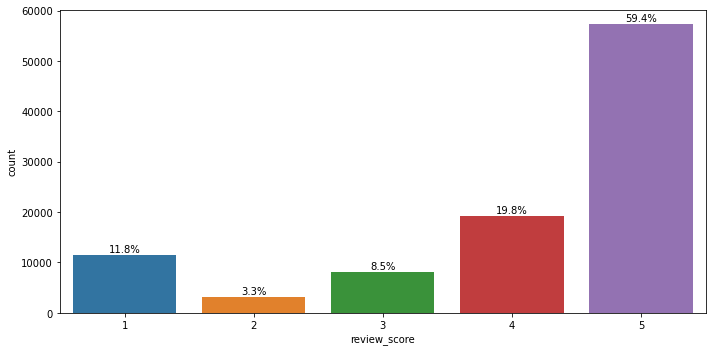

In [141]:
# Barchart visualisation of orders payment sequential
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='review_score',
                   data=order_reviews)
total = len(orders)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Same here, no modification needed for this dataset

In [142]:
# Keep importante variable
order_reviews = order_reviews.loc[:, ['review_id',
                                      'order_id',
                                      'review_score',
                                      'review_creation_date']]

In [143]:
order_reviews.head()

,review_id,order_id,review_score,review_creation_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00


### Merging datasets

In [144]:
# Merging dataset into working datset
WRK_orders = orders.merge(order_infos,
                          how='inner',
                          on='order_id')

In [145]:
# Merging dataset into working datset
WRK_orders = WRK_orders.merge(order_reviews,
                              how='inner',
                              on='order_id')

In [146]:
WRK_orders.head()

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,tot_price,tot_freight_value,nbr_items,review_id,review_score,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,29.99,8.72,1,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,118.70,22.76,1,8d5266042046a06655c8db133d120ba5,4,2018-08-08 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,159.90,19.22,1,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,45.00,27.20,1,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,19.90,8.72,1,e50934924e227544ba8246aeb3770dd4,5,2018-02-17 00:00:00


In [147]:
# Drop reviews id variables
WRK_orders.drop('review_id', axis=1, inplace=True)

In [148]:
# Create working dataset
order_payments.to_csv('data/WRK_orders_payments.csv', index=False)

## Customers

customers dataset has no missing values. 
In this dataset we have the geographical details on every customers. The primary key is customer_unique_id.

Order_items have 99441 lines and 5 columns

- customer_id the foreign key to connnect to order based datasets


In [149]:
# Datasets loading
customers = pd.read_csv('data/olist_customers_dataset.csv')

In [150]:
print(customers.shape)
display(customers.sample(10))

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
93367,72024934cd5851876fea593673f1fc38,6dcfbf03e3b9454a0a0f197f6eed055d,15801,catanduva,SP
35065,0050ee32fbb93383fb0d9e3d8ee89a07,0301e2b22f44b5a060987ecf49f8ada8,78400,diamantino,MT
24544,f3fa3dc9fd162f9d89d6d0957aeebdf6,cd1a89e939f56a1809e967f4740305af,93044,sao leopoldo,RS
24942,657bd5dd862e0780a9bbfa171110cd93,4dae8bfe22f589ac7f8f13566be3b24e,4827,sao paulo,SP
83125,486ac5f6c418c91aeb7abdc247dab3f7,26f33fca099a1ffd1d8fd601d1e5c4d6,17400,garca,SP
7301,527ab9f4e18d3d5f24b5146bce26a745,9733b0329e8f54f126a9548c03d719dc,13469,americana,SP
91615,432e843186d4ed1be1c754d8fea8c14a,b1497b8ce2b02620832b8c1d8e5b153e,12234,sao jose dos campos,SP
61564,0e04a0d0de3a7dd87a6d7a2931525f3b,139093b1c6e7e3108ac0469ce43bfb99,24240,niteroi,RJ
30632,94c515bef144d64e9f9ffee71a396d15,e544e542326f2acc4b811cad1de36d12,18117,votorantim,SP
41056,b7ac02c7140a36d272f16840d4a55871,a95f5d1a093f55b0771e5d6212540ecc,76200,ipora,GO


In [151]:
# Exploration of missing values
filling_factor(customers)

,column_name,missing_count,filling_factor
0,customer_id,0,100.0
1,customer_unique_id,0,100.0
2,customer_zip_code_prefix,0,100.0
3,customer_city,0,100.0
4,customer_state,0,100.0


There is no missing values in the customer dataset

In [152]:
# Column by column analysis
df = customers
for column in df.columns:
    if df[column].nunique() < 30:
        print('Column {}, unique value :\n{}\n'.format(column,
                                                       df[column].unique()))
    else:
        print('Column {}, {} unique value'.format(column,
                                                  df[column].nunique()))

Column customer_id, 99441 unique value
Column customer_unique_id, 96096 unique value
Column customer_zip_code_prefix, 14994 unique value
Column customer_city, 4119 unique value
Column customer_state, unique value :
['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']



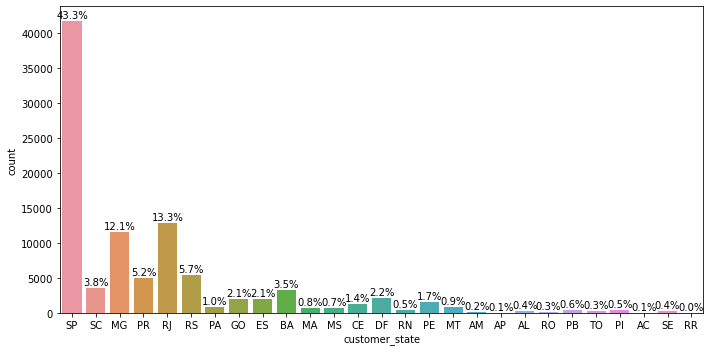

In [153]:
# Barchart visualisation of customer state
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='customer_state',
                   data=customers)
total = len(orders)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

We homogenise the customer city dataset to remove differente case spelling for the same city

In [154]:
# Function to clean string columns
import unidecode


def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [155]:
customers['customer_city'] = customers['customer_city'].apply(pretty_string)

 - customer_id is the primary key and the foreign key to order dataset it represente one purchase of one customer
 - customer_unique_id is the unique identification of one customer

In [156]:
# Merging dataset into o working datset
WRK_orders = WRK_orders.merge(customers,
                              how='inner',
                              on='customer_id')
WRK_orders.head()

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,tot_price,tot_freight_value,nbr_items,review_score,review_creation_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,29.99,8.72,1,4,2017-10-11 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,118.70,22.76,1,4,2018-08-08 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,159.90,19.22,1,5,2018-08-18 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,45.00,27.20,1,5,2017-12-03 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,19.90,8.72,1,5,2018-02-17 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [157]:
# Drop customer id variables
WRK_orders.drop('customer_id', axis=1, inplace=True)

## Geolocation

Geolocation has no missing values. 
In this dataset we have geolocation information for zip_code, city, state

Order_items have 1000163 lines and 5 columns

In [158]:
# Datasets loading
geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')

In [159]:
# Visualisation of the geolocation dataset
display(geolocation.head())
print(geolocation.shape)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


(1000163, 5)


In [160]:
filling_factor(geolocation)

,column_name,missing_count,filling_factor
0,geolocation_zip_code_prefix,0,100.0
1,geolocation_lat,0,100.0
2,geolocation_lng,0,100.0
3,geolocation_city,0,100.0
4,geolocation_state,0,100.0


In [161]:
# Column by column analysis
df = geolocation
for column in df.columns:
    if df[column].nunique() < 30:
        print('Column {}, unique value :\n{}\n'.format(column,
                                                       df[column].unique()))
    else:
        print('Column {}, {} unique value'.format(column,
                                                  df[column].nunique()))

Column geolocation_zip_code_prefix, 19015 unique value
Column geolocation_lat, 717360 unique value
Column geolocation_lng, 717613 unique value
Column geolocation_city, 8011 unique value
Column geolocation_state, unique value :
['SP' 'RN' 'AC' 'RJ' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']



In [162]:
# Clean city name
geolocation['geolocation_city'] = geolocation['geolocation_city']\
    .apply(pretty_string)

In [163]:
# Column by column analysis
df = geolocation
for column in df.columns:
    if df[column].nunique() < 30:
        print('Column {}, unique value :\n{}\n'.format(column,
                                                       df[column].unique()))
    else:
        print('Column {}, {} unique value'.format(column,
                                                  df[column].nunique()))

Column geolocation_zip_code_prefix, 19015 unique value
Column geolocation_lat, 717360 unique value
Column geolocation_lng, 717613 unique value
Column geolocation_city, 5967 unique value
Column geolocation_state, unique value :
['SP' 'RN' 'AC' 'RJ' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']



In [164]:
# CHeck for duplicated values
df = geolocation[geolocation.duplicated() == False]


In [165]:
df.shape

(720496, 5)

In [166]:
geo = geolocation.groupby(['geolocation_zip_code_prefix',
                           'geolocation_city',
                           'geolocation_state'])\
    .agg(latitude=('geolocation_lat',
                   'mean'),
         longitude=('geolocation_lng',
                    'mean')).reset_index()

In [167]:
geo.shape

(19616, 5)

In [168]:
# This take too much time

# import folium
# map_osm = folium.Map()
# map_osm = folium.Map(location=[geo['latitude'].mean(),
#                      geo['longitude'].mean()],
#                      zoom_start=5)
# for i in range(0,len(geo)):
#     folium.Circle([geo.iloc[i]['latitude'],
#                    geo.iloc[i]['longitude']],
#                    radius=2,
#                    popup=geo.iloc[i]['geolocation_city']).add_to(map_osm)
# map_osm

In [169]:
# # Merging dataset into o working datset
# WRK_orders.merge(geo,
#                  how='inner',
#                  left_on=['customer_zip_code_prefix',
#                           'customer_city',
#                           'customer_state'],
#                  right_on=['geolocation_zip_code_prefix',
#                            'geolocation_city',
#                            'geolocation_state'])

## Products

products has a very few misisng values. 
In this dataset we have the details of products per order. product_id is the primary key of the dataset.

Order_items have 32951 lines and 9 columns

- product_id the foreign key to connnect to other datasets


In [170]:
# Datasets loading
products = pd.read_csv('data/olist_products_dataset.csv')

In [171]:
# Visualisation of the products dataset
display(products.sample(10))
print(products.shape)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
28771,a226729b96bbb6962f9f8fc6a14db590,moveis_escritorio,41.0,560.0,1.0,16750.0,63.0,58.0,26.0
30918,ea8961270de20e665fcbb36044d6580f,construcao_ferramentas_construcao,47.0,414.0,1.0,100.0,25.0,3.0,20.0
12379,7c4625a299889fb920765a0cac740045,esporte_lazer,52.0,753.0,1.0,1350.0,35.0,25.0,25.0
29306,c34a95f3587a27afcfdc7b4ba554ce37,utilidades_domesticas,50.0,866.0,1.0,50.0,16.0,16.0,16.0
24752,1b9257f42072f68e325a4dc79dd99ae4,esporte_lazer,46.0,1850.0,1.0,1450.0,20.0,30.0,20.0
8592,9d32095f76b97762307e86cfc18dd7a0,cama_mesa_banho,38.0,213.0,2.0,400.0,25.0,9.0,19.0
9477,67e927f7378303fc91ee4c3fc301bf5a,perfumaria,47.0,2024.0,1.0,251.0,18.0,11.0,15.0
22504,9af62fae6f9a2b963c40a81d29d02ab3,cama_mesa_banho,47.0,572.0,1.0,800.0,17.0,17.0,17.0
6465,b1981e2c01dadbfbc44f735b74c5038f,beleza_saude,47.0,1509.0,1.0,500.0,35.0,12.0,18.0
30761,7adebeebd22a2f3271bdb33ebe37caaa,automotivo,60.0,634.0,5.0,2000.0,68.0,9.0,35.0


(32951, 9)


In [172]:
# Exploration of missing values
filling_factor(products)

,column_name,missing_count,filling_factor
0,product_category_name,610,98.148766
1,product_name_lenght,610,98.148766
2,product_description_lenght,610,98.148766
3,product_photos_qty,610,98.148766
4,product_weight_g,2,99.993930
5,product_length_cm,2,99.993930
6,product_height_cm,2,99.993930
7,product_width_cm,2,99.993930
8,product_id,0,100.000000


In [173]:
# Column by column analysis
df = products
for column in df.columns:
    if df[column].nunique() < 30:
        print('Column {}, unique value :\n{}\n'.format(column,
                                                       df[column].unique()))
    else:
        print('Column {}, {} unique value'.format(column,
                                                  df[column].nunique()))

Column product_id, 32951 unique value
Column product_category_name, 73 unique value
Column product_name_lenght, 66 unique value
Column product_description_lenght, 2960 unique value
Column product_photos_qty, unique value :
[ 1.  4.  2.  3.  5.  9.  6. nan  7. 12. 10. 11. 17.  8. 15. 13. 14. 20.
 18. 19.]

Column product_weight_g, 2204 unique value
Column product_length_cm, 99 unique value
Column product_height_cm, 102 unique value
Column product_width_cm, 95 unique value


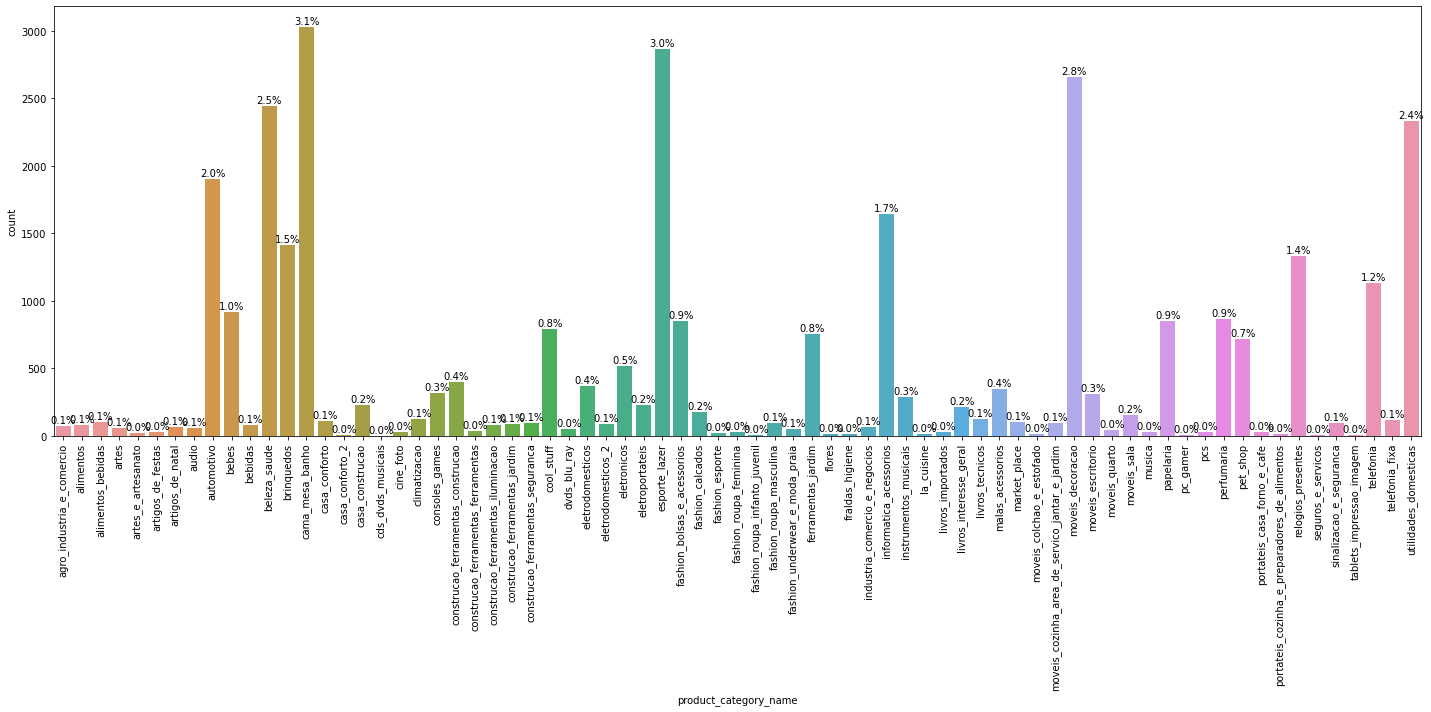

In [174]:
# Barchart visualisation of product_category_name
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='product_category_name',
                   data=products.sort_values(by=['product_category_name']))
total = len(orders)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

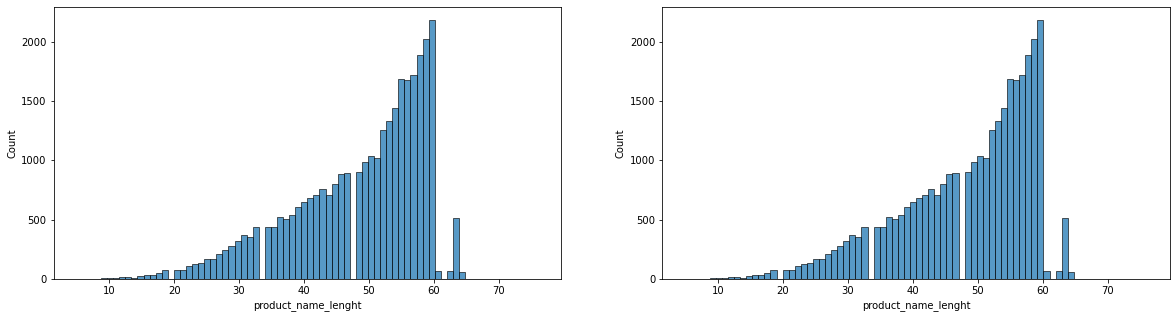

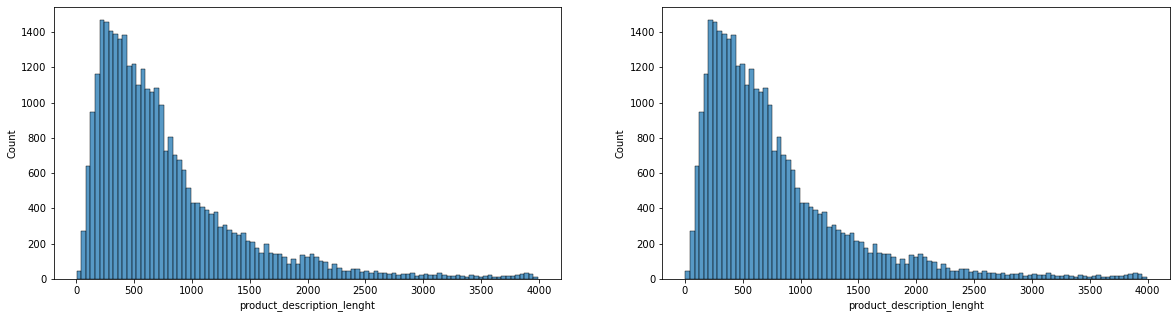

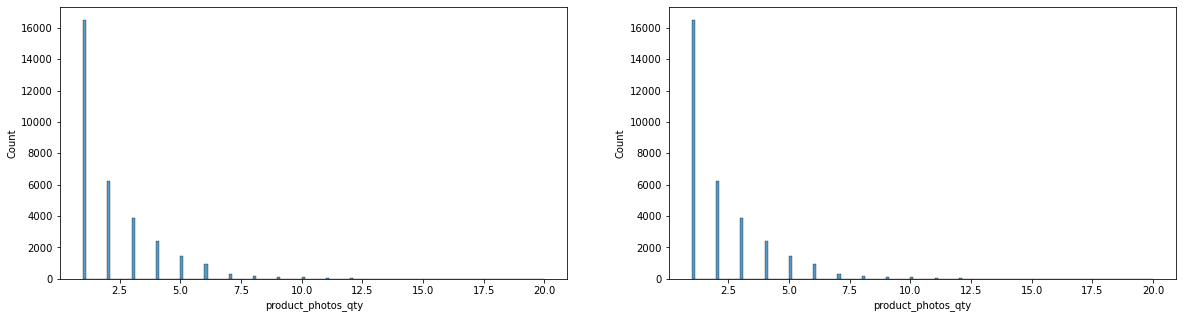

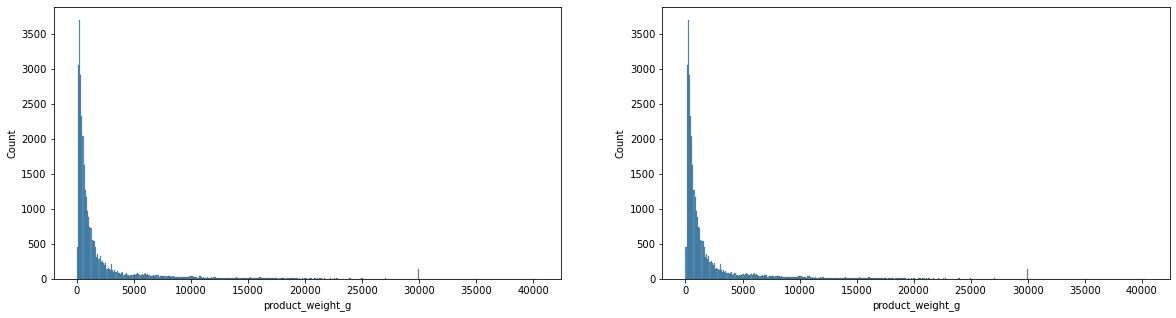

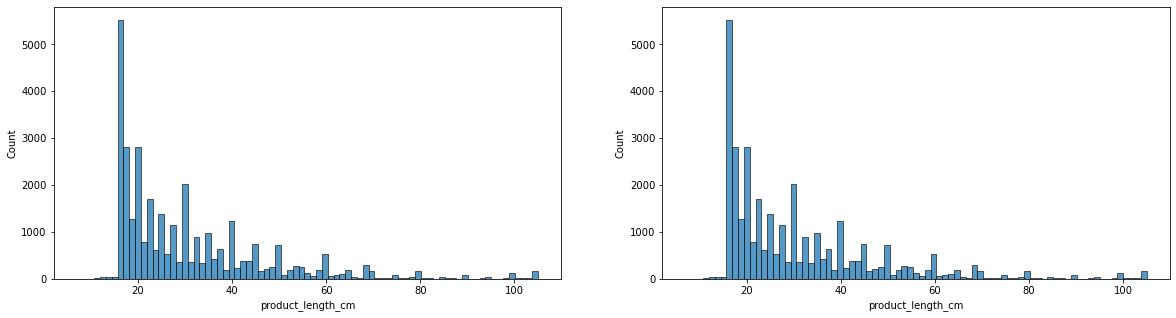

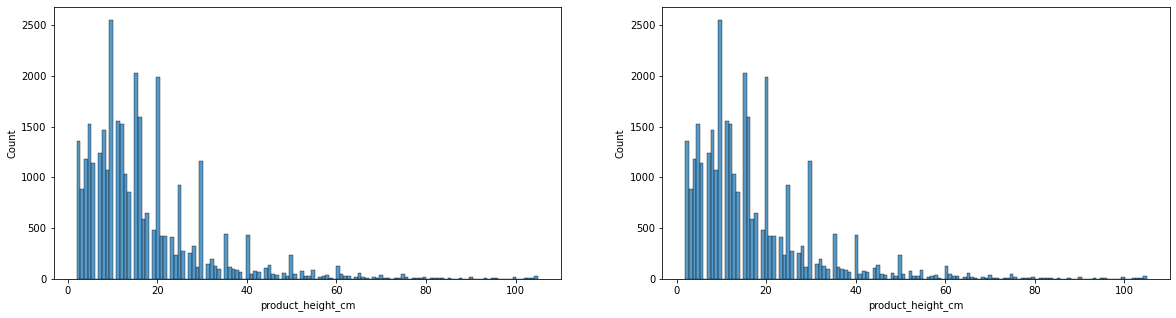

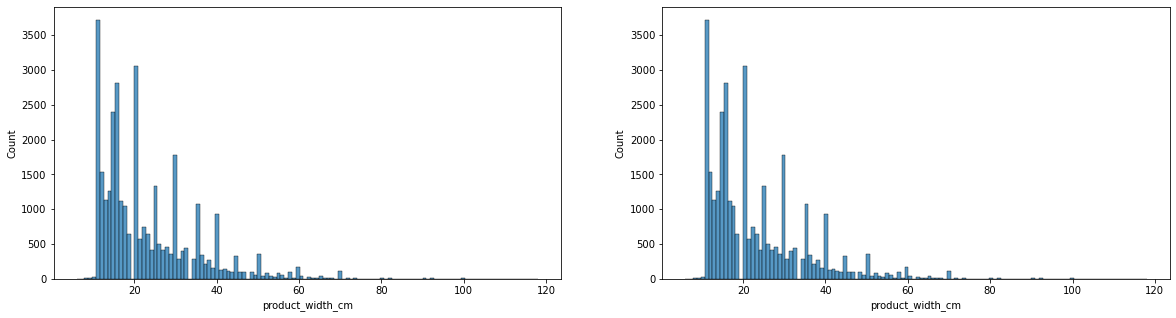

In [175]:
df_continous = products.select_dtypes('float')
for col in df_continous:
    fig = plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(x=products[col],
                 data=products)

    plt.subplot(1, 2, 2)
    sns.histplot(x=products[col],
                 data=products)

It seems to have no outliers in prodcuts dataset

We use the translation dataset to translate product category in english 

In [176]:
trad = pd.read_csv('data/product_category_name_translation.csv')

In [177]:
trad = dict(zip(trad.product_category_name,
                trad.product_category_name_english))

In [178]:
trad

{'beleza_saude': 'health_beauty',
 'informatica_acessorios': 'computers_accessories',
 'automotivo': 'auto',
 'cama_mesa_banho': 'bed_bath_table',
 'moveis_decoracao': 'furniture_decor',
 'esporte_lazer': 'sports_leisure',
 'perfumaria': 'perfumery',
 'utilidades_domesticas': 'housewares',
 'telefonia': 'telephony',
 'relogios_presentes': 'watches_gifts',
 'alimentos_bebidas': 'food_drink',
 'bebes': 'baby',
 'papelaria': 'stationery',
 'tablets_impressao_imagem': 'tablets_printing_image',
 'brinquedos': 'toys',
 'telefonia_fixa': 'fixed_telephony',
 'ferramentas_jardim': 'garden_tools',
 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
 'eletroportateis': 'small_appliances',
 'consoles_games': 'consoles_games',
 'audio': 'audio',
 'fashion_calcados': 'fashion_shoes',
 'cool_stuff': 'cool_stuff',
 'malas_acessorios': 'luggage_accessories',
 'climatizacao': 'air_conditioning',
 'construcao_ferramentas_construcao': 'construction_tools_construction',
 'moveis_cozinha_area_de_ser

In [179]:
# Change portugesh name category in english
products['product_category_name'] \
    = products['product_category_name'].replace(trad)

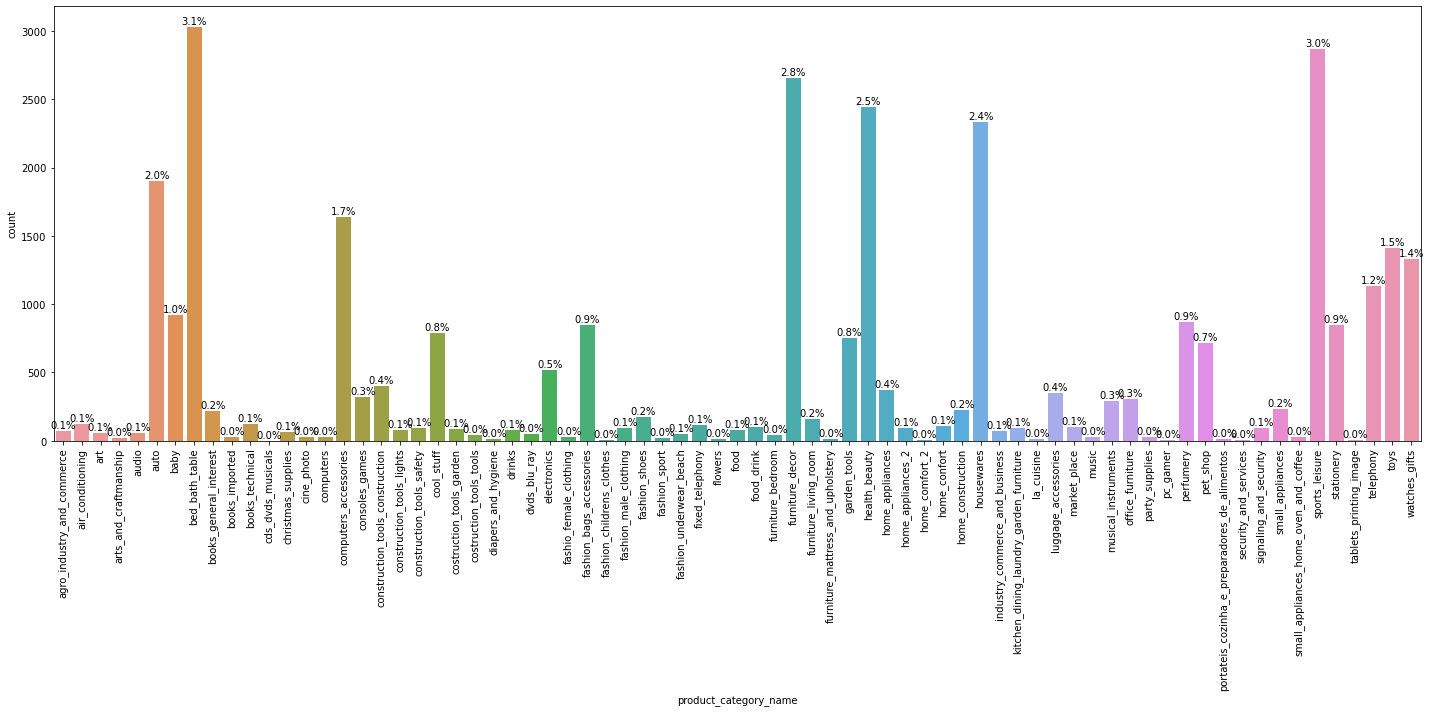

In [180]:
# Barchart visualisation of product_category_name
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='product_category_name',
                   data=products.sort_values(by=['product_category_name']))
total = len(orders)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [181]:
# Merging dataset into o working datset
WRK_order_items = order_items.merge(products,
                                    how='inner',
                                    on='product_id')
WRK_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [182]:
# Drop customer id variables
WRK_order_items.drop('product_id', axis=1, inplace=True)

## sellers

Sellers dataser has no missing values. 
In this dataset we have the geographical details on sellers

Order_items have 3095 lines and 4 columns

- seller_id the foreign key to connnect to other datasets


In [183]:
# Datasets loading
sellers = pd.read_csv('data/olist_sellers_dataset.csv')

In [184]:
# Visualisation of the products dataset
display(sellers.sample(10))
print(sellers.shape)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1545,112453736dbe3889cfb74e1aaa0ba0c1,3520,sao paulo,SP
54,41e0fa5761c886a630994a55c12087e7,11446,guaruja,SP
1719,929f342384a6607afe143d789ade1316,86065,londrina,PR
472,f457c46070d02cadd8a68551231220dd,87047,maringa,PR
1728,98115075dd26cb8835946fc6086f5d30,9687,ao bernardo do campo,SP
110,eb72802c83dc7547529c9546d1a9b8ef,13504,rio claro,SP
1074,2d518637f53161b973e01f56ea4bb88e,2992,sao paulo,SP
75,dedcab67899479e4ea5dcc4eba47f587,89258,jaragua do sul,SC
2850,f8db351d8c4c4c22c6835c19a46f01b0,13324,salto,SP
196,caa9bc43a9fe8cf9c564ddd8a03cc4a6,12308,jacarei,SP


(3095, 4)


In [185]:
# Exploration of missing values
filling_factor(sellers)

,column_name,missing_count,filling_factor
0,seller_id,0,100.0
1,seller_zip_code_prefix,0,100.0
2,seller_city,0,100.0
3,seller_state,0,100.0


In [186]:
# Column by column analysis
df = sellers
for column in df.columns:
    if df[column].nunique() < 30:
        print('Column {}, unique value :\n{}\n'.format(column,
                                                       df[column].unique()))
    else:
        print('Column {}, {} unique value'.format(column,
                                                  df[column].nunique()))

Column seller_id, 3095 unique value
Column seller_zip_code_prefix, 2246 unique value
Column seller_city, 611 unique value
Column seller_state, unique value :
['SP' 'RJ' 'PE' 'PR' 'GO' 'SC' 'BA' 'DF' 'RS' 'MG' 'RN' 'MT' 'CE' 'PB'
 'AC' 'ES' 'RO' 'PI' 'MS' 'SE' 'MA' 'AM' 'PA']



In [187]:
# Case modification of city variable
sellers['seller_city'] = sellers['seller_city'].apply(pretty_string)

In [188]:
# Column by column analysis
df = sellers
for column in df.columns:
    if df[column].nunique() < 30:
        print('Column {}, unique value :\n{}\n'.format(column,
                                                       df[column].unique()))
    else:
        print('Column {}, {} unique value'.format(column,
                                                  df[column].nunique()))

Column seller_id, 3095 unique value
Column seller_zip_code_prefix, 2246 unique value
Column seller_city, 606 unique value
Column seller_state, unique value :
['SP' 'RJ' 'PE' 'PR' 'GO' 'SC' 'BA' 'DF' 'RS' 'MG' 'RN' 'MT' 'CE' 'PB'
 'AC' 'ES' 'RO' 'PI' 'MS' 'SE' 'MA' 'AM' 'PA']



No modification need here

## Final merging

In [189]:
# Merging dataset into o working datset
WRK_order_items = WRK_order_items.merge(sellers,
                                        how='inner',
                                        on='seller_id')
WRK_order_items.head()

,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,1,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,1,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP


In [190]:
# Drop customer id variables
WRK_order_items.drop('seller_id', axis=1, inplace=True)

# Creation a working dataset CSV

In [191]:
WRK_orders.to_csv('data/WRK_orders.csv', index=False)
WRK_order_items.to_csv('data/WRK_order_items.csv', index=False)
order_payments.to_csv('data/WRK_order_payments.csv', index=False)